# Single-layer perceptron network for uppercase alphabet classification

## Imports
Code section that contains all the necessary imports for the full execution of the prediction algorithm.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

## Activation function
Perceptron activation function called “step function”.

In [2]:
# Activation (step function)
def step_function(x):
    return np.where(x >= 0, 1, 0)

## Prediction function
Function to make predictions by evaluating the activation function by the “net”.

In [3]:
# Function for making predictions(output)
def perceptron_predict(X, weights):
    Y = np.zeros(weights.shape[0], dtype=int)

    for i in range(weights.shape[0]):
        Y[i] = step_function(np.dot(X, weights[i, 1:]) + weights[i, 0])

    return Y

## Training function
Training of the perceptron by means of modifications of the different weights and storage of the total errors of each iteration for each epoch. At the end, the execution of the code is stopped when the total error is zero, in order to avoid iterations or epochs in spite of having already obtained the desired learning.

In [4]:
# Perceptron algorithm
def perceptron_train(X, y, learning_rate=0.1, epochs=100):
    # Initialize weights (one more for bias)
    weights = np.random.rand(y.shape[1], X.shape[1] + 1)

    # Error vector
    errors = []

    # Training
    for _ in range(epochs):
        total_error = 0

        for xi, target in zip(X, y):
            # Calculate output(prediction)
            output = perceptron_predict(xi, weights)

            # Calculate the absolute error
            error = target - output
            total_error += sum(abs(error))

            # Update weights for each neuron
            for i in range(weights.shape[0]):
                update = learning_rate * error[i]
                weights[i, 1:] += update * xi
                weights[i, 0] += update

        errors.append(int(total_error))

        # Break code execution with a total error equal to zero
        if total_error == 0:
            break

    return weights, errors

## Input data, output data and training
The input and output data are stored in variables for further processing in the perceptron and their respective training.

In [5]:
# Prepare input and output data
# Input data for uppercase alphabet pattern
X = np.array([
    [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], # A
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0], # B
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1], # C
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0], # D
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1], # E
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], # F
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1], # G
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], # H
    [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], # I
    [0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0], # J
    [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1], # K
    [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1], # L
    [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], # M
    [1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1], # N
    [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0], # O
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], # P
    [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1], # Q
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1], # R
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], # S
    [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], # T
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0], # U
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], # V
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1], # W
    [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], # X
    [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], # Y
    [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1], # Z
])

# Output data for uppercase alphabet pattern
y = np.array([
    [0, 0, 0, 0, 1],  # A
    [0, 0, 0, 1, 0],  # B
    [0, 0, 0, 1, 1],  # C
    [0, 0, 1, 0, 0],  # D
    [0, 0, 1, 0, 1],  # E
    [0, 0, 1, 1, 0],  # F
    [0, 0, 1, 1, 1],  # G
    [0, 1, 0, 0, 0],  # H
    [0, 1, 0, 0, 1],  # I
    [0, 1, 0, 1, 0],  # J
    [0, 1, 0, 1, 1],  # K
    [0, 1, 1, 0, 0],  # L
    [0, 1, 1, 0, 1],  # M
    [0, 1, 1, 1, 0],  # N
    [0, 1, 1, 1, 1],  # O
    [1, 0, 0, 0, 0],  # P
    [1, 0, 0, 0, 1],  # Q
    [1, 0, 0, 1, 0],  # R
    [1, 0, 0, 1, 1],  # S
    [1, 0, 1, 0, 0],  # T
    [1, 0, 1, 0, 1],  # U
    [1, 0, 1, 1, 0],  # V
    [1, 0, 1, 1, 1],  # W
    [1, 1, 0, 0, 0],  # X
    [1, 1, 0, 0, 1],  # Y
    [1, 1, 0, 1, 0]   # Z
])

# Training the perceptron
weights, errors = perceptron_train(X, y)

print(f"Weights: {weights}")
print(f"Errors: {errors}")

Weights: [[ 0.5376449   0.23206747  0.04945494  0.10585646  0.03618572  0.25983445
   1.50613544 -0.46972376 -0.32517549 -0.22383197  1.60823234 -0.6162766
   0.5267099  -0.2730632  -0.13854534  0.08990755 -2.34046698  0.98246573
   0.04091411  1.23721509 -1.29159412 -1.18492936 -0.34664043 -0.06403046
   0.62527907 -0.67375888]
 [-0.40867358  0.08436892 -0.3572589  -0.01771065 -0.07655767  0.07878335
  -0.66350176  0.59441058 -0.10708539  1.17909359 -0.38790451 -0.07724025
   0.24179263 -0.49244774  0.19565572  0.266526    0.64423112  0.35387681
   0.69969693 -1.06759249  0.18304463  0.51040889  0.70675005 -0.31062145
  -0.44792681  0.75697689]
 [-1.07511255  0.61194878  0.00615254  0.12648937 -0.10249807  0.08146098
   0.7471789   0.23748229  0.90941786 -0.20235379 -0.9953418   0.12484928
  -0.30237425 -0.11294393 -0.47795339  1.41348523  0.7802341   0.34468531
  -0.22876993 -0.2432485  -0.22935482  0.1700844  -0.48295379  0.0237677
   0.48097833 -0.9458102 ]
 [-1.78740942 -0.0720469

## Alphabet patterns
The entries have a specific pattern that will determine the sorting algorithm from one letter to another.

In [6]:
# Printing alphabet patterns
for i in range(X.shape[0]):
    print(f"Letter {i + 1}:")

    for j in range(0, X.shape[1], 5):
        print(" ".join(map(str, X[i][j:j + 5])))

    print()

Letter 1:
0 1 1 1 0
1 0 0 0 1
1 1 1 1 1
1 0 0 0 1
1 0 0 0 1

Letter 2:
1 1 1 1 0
1 0 0 0 1
1 1 1 1 0
1 0 0 0 1
1 1 1 1 0

Letter 3:
0 1 1 1 1
1 0 0 0 0
1 0 0 0 0
1 0 0 0 0
0 1 1 1 1

Letter 4:
1 1 1 1 0
1 0 0 0 1
1 0 0 0 1
1 0 0 0 1
1 1 1 1 0

Letter 5:
1 1 1 1 1
1 0 0 0 0
1 1 1 1 1
1 0 0 0 0
1 1 1 1 1

Letter 6:
1 1 1 1 1
1 0 0 0 0
1 1 1 1 0
1 0 0 0 0
1 0 0 0 0

Letter 7:
0 1 1 1 1
1 0 0 0 0
1 0 1 1 1
1 0 0 0 1
0 1 1 1 1

Letter 8:
1 0 0 0 1
1 0 0 0 1
1 1 1 1 1
1 0 0 0 1
1 0 0 0 1

Letter 9:
1 1 1 1 1
0 0 1 0 0
0 0 1 0 0
0 0 1 0 0
1 1 1 1 1

Letter 10:
0 1 1 1 1
0 0 0 1 0
0 0 0 1 0
1 0 0 1 0
0 1 1 0 0

Letter 11:
1 0 0 0 1
1 0 0 1 0
1 1 1 0 0
1 0 0 1 0
1 0 0 0 1

Letter 12:
1 0 0 0 0
1 0 0 0 0
1 0 0 0 0
1 0 0 0 0
1 1 1 1 1

Letter 13:
1 0 0 0 1
1 1 0 1 1
1 0 1 0 1
1 0 0 0 1
1 0 0 0 1

Letter 14:
1 0 0 0 1
1 1 0 0 1
1 0 1 0 1
1 0 0 1 1
1 0 0 0 1

Letter 15:
0 1 1 1 0
1 0 0 0 1
1 0 0 0 1
1 0 0 0 1
0 1 1 1 0

Letter 16:
1 1 1 1 0
1 0 0 0 1
1 1 1 1 0
1 0 0 0 0
1 0 0 0 0

Letter 17:
0 1 1 

## Overall error graph
Graph of the global error taking into account a total sum of each error within each of the iterated epochs.

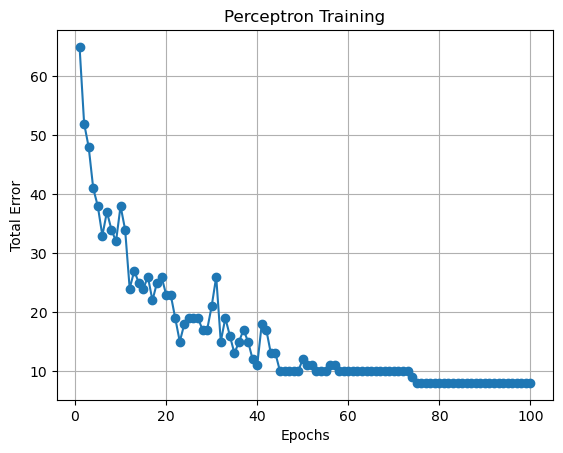

In [7]:
# Graphing the global error in each epoch
plt.figure(1)
plt.plot(range(1, len(errors) + 1), errors, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.title("Perceptron Training")
plt.grid(True)
plt.show()

## Validation of predictions
The predictions are validated with the previously stated inputs for the training of the same perceptron and the weights already modified to arrive at this learning.

In [8]:
# Testing the perceptron with the input data
for xi in X:
    prediction = perceptron_predict(xi, weights)

    print(f"Input: {xi} - Prediction: {prediction}")



Input: [0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1] - Prediction: [0 1 0 0 1]
Input: [1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0] - Prediction: [0 0 0 1 0]
Input: [0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1] - Prediction: [0 0 0 1 1]
Input: [1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0] - Prediction: [0 0 1 0 0]
Input: [1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1] - Prediction: [0 1 1 0 1]
Input: [1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0] - Prediction: [0 0 1 1 0]
Input: [0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1] - Prediction: [0 0 1 1 1]
Input: [1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1] - Prediction: [0 1 0 0 0]
Input: [1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1] - Prediction: [0 1 0 0 1]
Input: [0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0] - Prediction: [0 1 0 1 0]
Input: [1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1] - Prediction: [0 1 0 1 1]
Input: [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1] - Pred

## Validation of predictions with noise data
The predictions are validated with the weights already modified after training and are used with data that are not correctly formatted, so they have noise in the binary representation of the alphabet.

In [19]:
# Input data with noise for uppercase alphabet pattern
X_test = np.array([
    [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], # A
    [1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0], # B
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1], # C
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0], # D
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1], # E
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], # F
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], # G
    [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], # H
    [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], # I
    [0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0], # J
    [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1], # K
    [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1], # L
    [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], # M
    [1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1], # N
    [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0], # O
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], # P
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1], # Q
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1], # R
    [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], # S
    [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], # T
    [1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0], # U
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0], # V
    [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1], # W
    [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], # X
    [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], # Y
    [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1], # Z
])

# Testing the perceptron with the input data having noise
for xi in X_test:
    prediction = perceptron_predict(xi, weights)

    print(f"Input: {xi} - Prediction: {prediction}")

Input: [0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1] - Prediction: [0 1 1 0 1]
Input: [1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0] - Prediction: [0 0 1 1 0]
Input: [0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1] - Prediction: [0 1 0 1 1]
Input: [1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0] - Prediction: [0 0 1 1 0]
Input: [1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1] - Prediction: [0 1 1 0 1]
Input: [1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0] - Prediction: [0 0 1 1 0]
Input: [0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1] - Prediction: [0 1 1 1 1]
Input: [1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1] - Prediction: [0 1 0 0 0]
Input: [1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1] - Prediction: [0 1 0 0 1]
Input: [0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0] - Prediction: [0 1 0 1 0]
Input: [1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1] - Prediction: [0 1 0 1 1]
Input: [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1] - Pred

## Alphabet patterns with noise
The entries have a specific pattern with noise that will determine the sorting algorithm from one letter to another.

In [21]:
# Printing alphabet patterns
for i in range(X_test.shape[0]):
    print(f"Letter {i + 1}:")

    for j in range(0, X_test.shape[1], 5):
        print(" ".join(map(str, X_test[i][j:j + 5])))

    print()

Letter 1:
0 1 1 1 0
1 0 1 0 1
1 1 1 1 1
1 0 0 0 1
1 0 0 0 1

Letter 2:
1 1 1 1 0
1 0 1 0 1
1 1 1 1 0
1 0 0 0 1
1 1 1 1 0

Letter 3:
0 1 1 1 1
1 0 0 0 0
1 0 0 0 0
1 0 0 0 1
0 1 1 1 1

Letter 4:
1 1 1 1 0
1 0 0 0 1
1 0 1 0 1
1 0 0 0 1
1 1 1 1 0

Letter 5:
1 1 1 1 1
1 1 0 0 0
1 1 1 1 1
1 0 0 0 0
1 1 1 1 1

Letter 6:
1 1 1 1 1
1 0 0 0 0
1 1 1 1 0
1 0 0 1 0
1 0 0 0 0

Letter 7:
0 1 1 1 1
1 0 0 0 0
1 0 1 1 1
1 0 1 0 1
0 1 1 1 1

Letter 8:
1 0 0 0 1
1 0 0 1 1
1 1 1 1 1
1 0 0 0 1
1 0 0 0 1

Letter 9:
1 1 1 1 1
0 1 1 0 0
0 0 1 0 0
0 0 1 0 0
1 1 1 1 1

Letter 10:
0 1 1 1 1
0 0 1 1 0
0 0 0 1 0
1 0 0 1 0
0 1 1 0 0

Letter 11:
1 0 0 0 1
1 0 0 1 0
1 1 1 0 0
1 0 1 1 0
1 0 0 0 1

Letter 12:
1 0 0 0 0
1 0 0 0 0
1 0 0 0 0
1 0 0 1 0
1 1 1 1 1

Letter 13:
1 0 0 0 1
1 1 1 1 1
1 0 1 0 1
1 0 0 0 1
1 0 0 0 1

Letter 14:
1 0 0 0 1
1 1 0 0 1
1 0 1 1 1
1 0 0 1 1
1 0 0 0 1

Letter 15:
0 1 1 1 0
1 0 0 0 1
1 0 1 0 1
1 0 0 0 1
0 1 1 1 0

Letter 16:
1 1 1 1 0
1 0 0 0 1
1 1 1 1 0
1 0 0 1 0
1 0 0 0 0

Letter 17:
0 1 1 